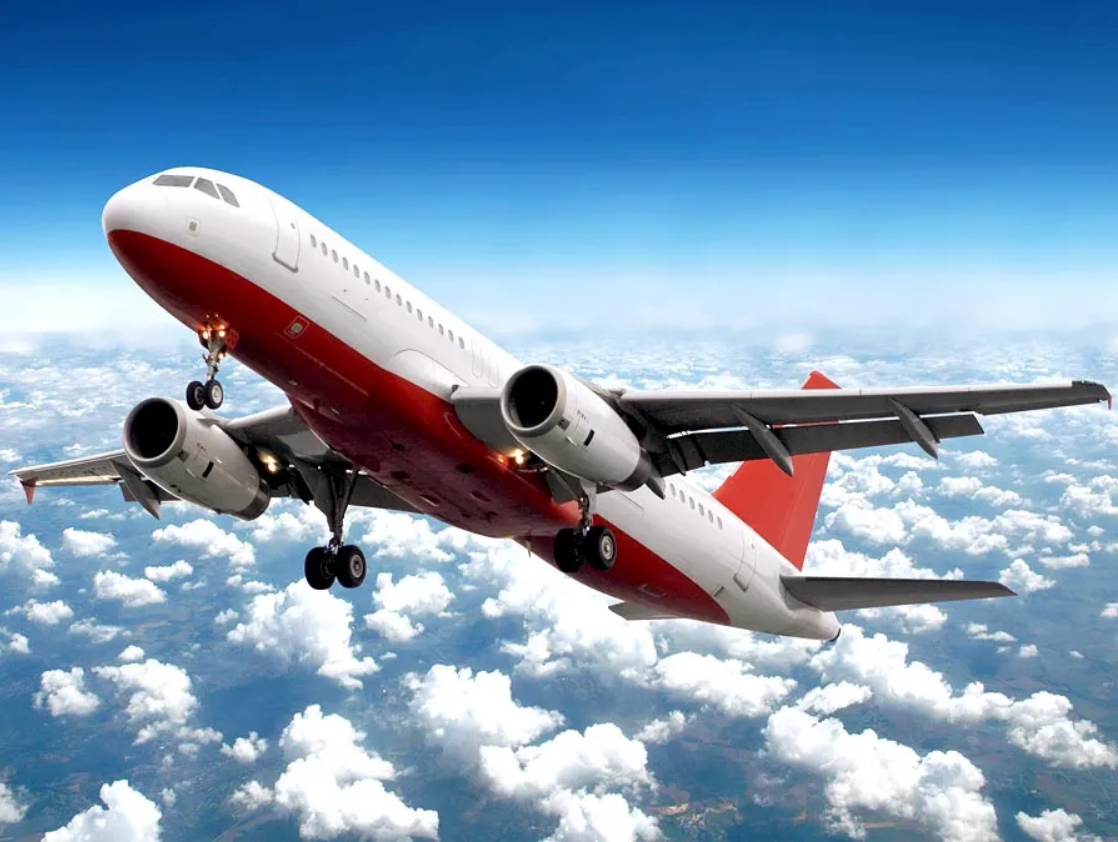

# Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Upload the data

In [2]:
df=pd.read_csv(r"C:\Users\Magic\Downloads\train.csv",index_col="Unnamed: 0")

# Discover the data

In [3]:
df.head()

id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied  

[5 rows x 24 columns]

 **`This dataset contains passengers and flight information with the following columns:`**

    
   * Gender: the gender of the passenger (male/female)
    
   * Customer Type:  type (loyal or disloyal )passenger
    
   * Age: The actual age of the passeners

   * Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Tavel)

   * Class: Travel class in the plane of the passengers (Business, Eco, Eo Plus)

   * Flight distance: The flight distance of ths journey

   * Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Appicable;1-5)

   * Departure/Arrival time convenient: Satisfaction level of Departure/Arrival tme convenient

   * Ease of Online booking: Satisfaction level o online booking

   * Gate location: Satisfaction level of Gate location

   * Food and drink: Satisfaction level of Food and drink

   * Online boarding: Satisfaction level of online boarding

   * Seat comfort: Satisfactin level of Seat comfort

   * Inflight entertainment: Satisfaction level of inflight entertainment

   * On-board service: Satisfactin level of On-board service

   * Leg room service: Satisfacion level of Leg room service

   * Baggage handling: Satisfction level of baggage handling

   * Check-in service: Satifaction level of Check-in service

   * Inflight service: Satisfaction level of inflight service

   * Cleanlinss: Satisfaction level of Cleanliness of the plane

   * Departure Delay in Minutes: Minutes delayed when departure

   * Arrival Dela in Minutes: Minutes delayed when Arrival

   * Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [4]:
df.shape

(103904, 24)

In [5]:
df.info()
#types all is well

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [6]:
df.describe()

id            Age  Flight Distance  Inflight wifi service  \
count  103904.000000  103904.000000    103904.000000          103904.000000   
mean    64924.210502      39.379706      1189.448375               2.729683   
std     37463.812252      15.114964       997.147281               1.327829   
min         1.000000       7.000000        31.000000               0.000000   
25%     32533.750000      27.000000       414.000000               2.000000   
50%     64856.500000      40.000000       843.000000               3.000000   
75%     97368.250000      51.000000      1743.000000               4.000000   
max    129880.000000      85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      103904.000000           103904.000000   
mean                            3.060296                2.756901   
std                             1.525075                1.398929   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding   Seat comfort  \
count  103904.000000   103904.000000    103904.000000  103904.000000   
mean        2.976883        3.202129         3.250375       3.439396   
std         1.277621        1.329533         1.349509       1.319088   
min         0.000000        0.000000         0.000000       0.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         3.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count           103904.000000     103904.000000     103904.000000   
mean                 3.358158          3.382363          3.351055   
std                  1.332991          1.288354          1.315605   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service    Cleanliness  \
count     103904.000000    103904.000000     103904.000000  103904.000000   
mean           3.631833         3.304290          3.640428       3.286351   
std            1.180903         1.265396          1.175663       1.312273   
min            1.000000         0.000000          0.000000       0.000000   
25%            3.000000         3.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count               103904.000000             103594.000000  
mean                    14.815618                 15.178678  
std                     38.230901                 38.698682  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                     12.000000                 13.000000  
max                   1592.000000               1584.000000

In [7]:
df.describe(include ='object')

Gender   Customer Type   Type of Travel     Class  \
count   103904          103904           103904    103904   
unique       2               2                2         3   
top     Female  Loyal Customer  Business travel  Business   
freq     52727           84923            71655     49665   

                   satisfaction  
count                    103904  
unique                        2  
top     neutral or dissatisfied  
freq                      58879

In [8]:
df.isna().sum()/len(df)

id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes        

In [9]:
df.duplicated().sum()
#No duplicated

0

# Data cleaning

In [10]:
df.drop(columns=["id"],inplace=True)

In [11]:
df.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                       3              3  ...                       1   
2                       2              2  ...                       5   
3                       5              5  ...                       2   
4                       3              3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 23 columns]

In [12]:
df.dropna(axis=0,inplace=True)

# EDA

* Are the most passengers Males or Females?

* What are the most type of travel?

* What is the most dissatisfaction or satisfied?

* Are the most passengers type loyal or disloyal?

* What is the most frequent class?

* What is the distribution of age?

* Distribution of Flight distance by satisfaction

* Distribution of Gender by satisfaction

*  Which class has the most satisfied ?

*  Distribution of passenger satisfaction by age group

*  Distribution of passenger satisfaction by cleanliness

*  Which class has the most infight entertainment?

*  Distribution of class with all flight facilities

*  Distribution of satisfaction with all the rest numeric features

*  Customer Satisfaction by Type of Travel

*  What is customer satisfaction by departure delay?

*  What is customer satisfaction by arrival delay?

*  What is the distribution of seat comfort with flight distance?

* What is distribution of seat comfort with each group of age?

* What is distribution of Arrival delay by Depature delay?



C:\Users\Magic\AppData\Local\Temp\ipykernel_21404\2073116630.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="viridis",annot=True,linewidth=1,vmin=-1,vmax=1,annot_kws={'size': 12,"weight" :"bold"})


<Axes: >

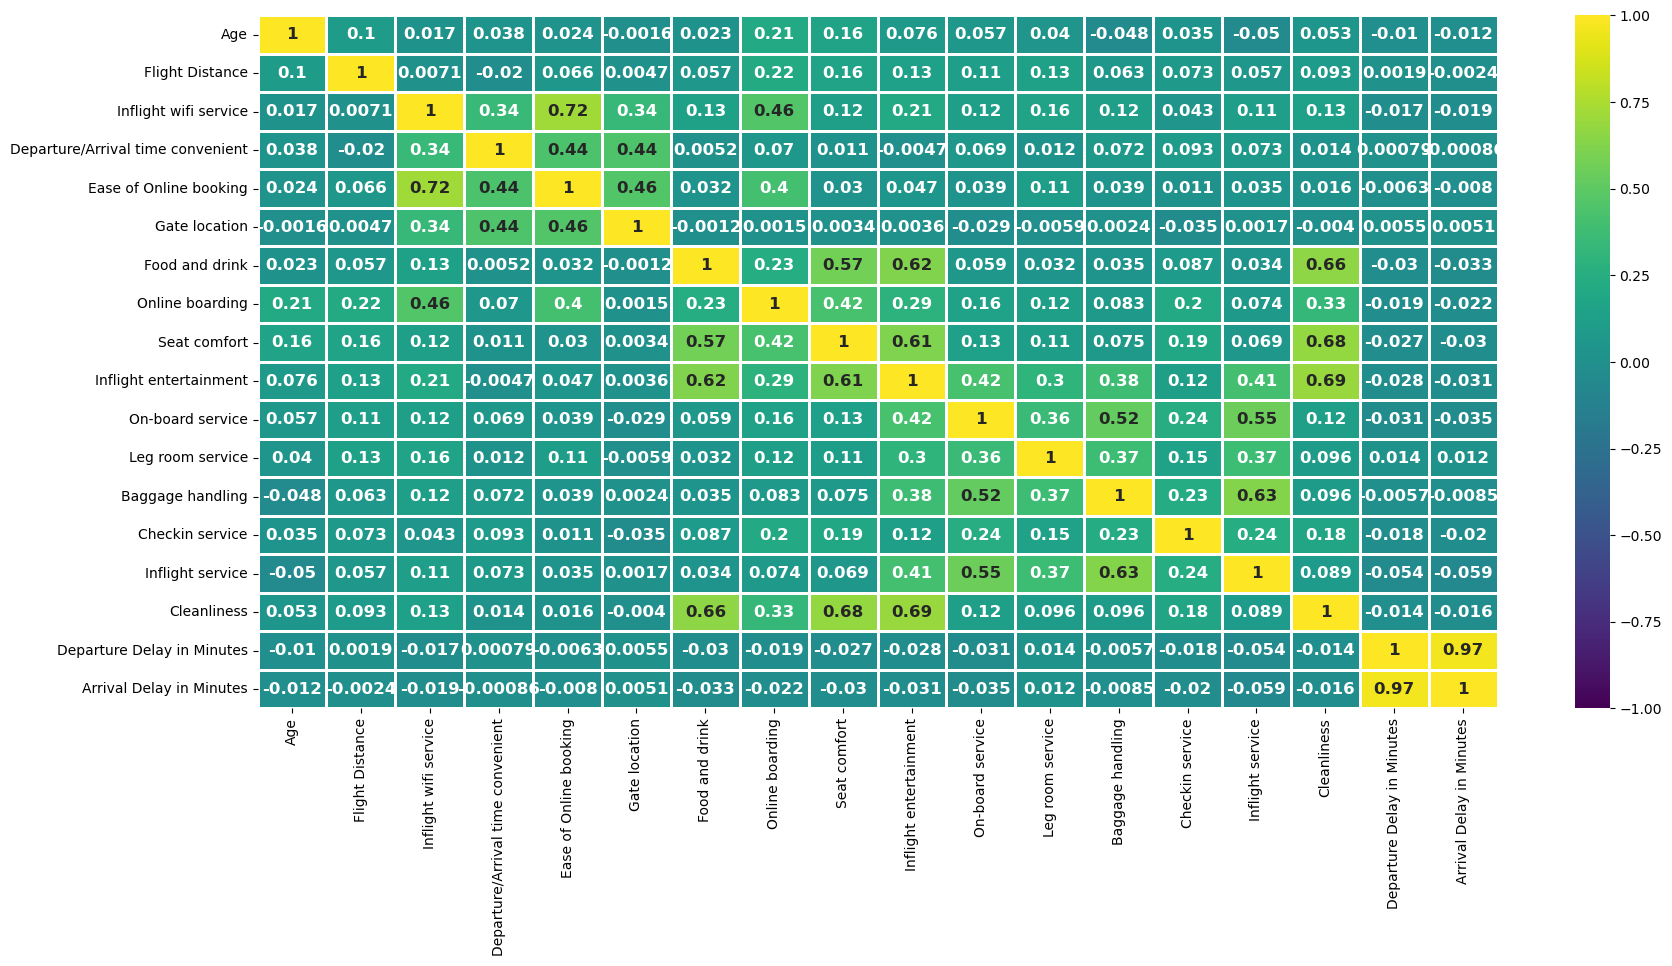

In [13]:
plt.figure(figsize=(20, 9))
#sns.set(font_scale=1.8)
sns.heatmap(df.corr(),cmap="viridis",annot=True,linewidth=1,vmin=-1,vmax=1,annot_kws={'size': 12,"weight" :"bold"})

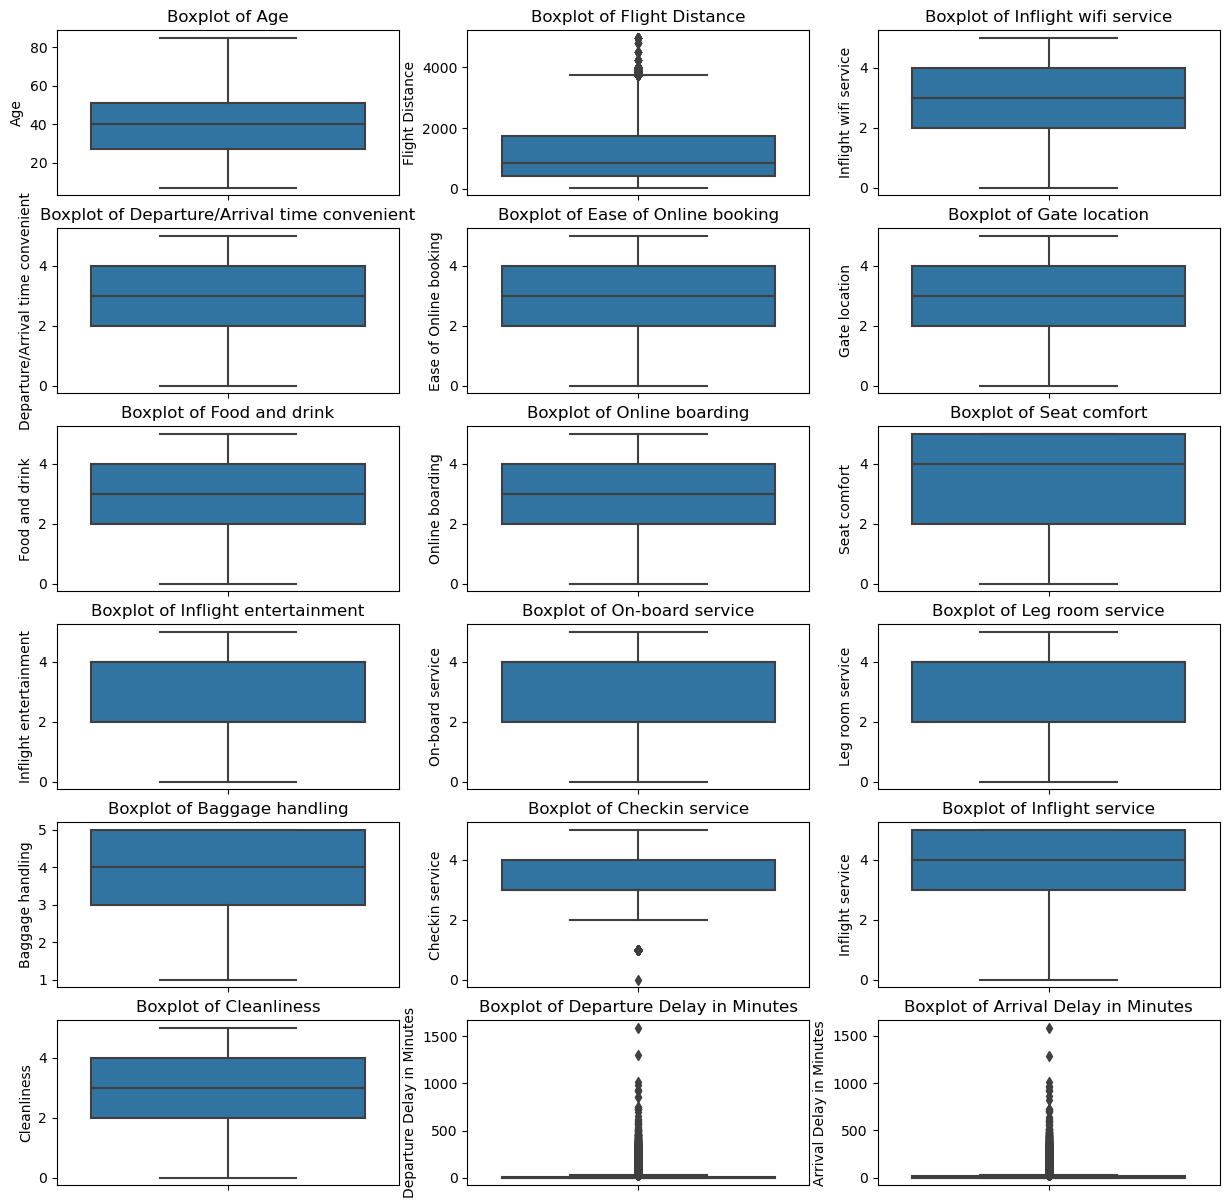

In [14]:
num_cols=df.select_dtypes(include=('int','float')).columns.to_list()
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 15))
# Flatten axes if necessary
axes = axes.flatten()
# Plot each rating on a subplot with smooth visuals
for i in range(len(num_cols)):
    sns.boxplot(y=num_cols[i], data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {num_cols[i]}', fontsize=12)
plt.show()
#there are outliers in fight distance,check in service,departure delay,arrival delay

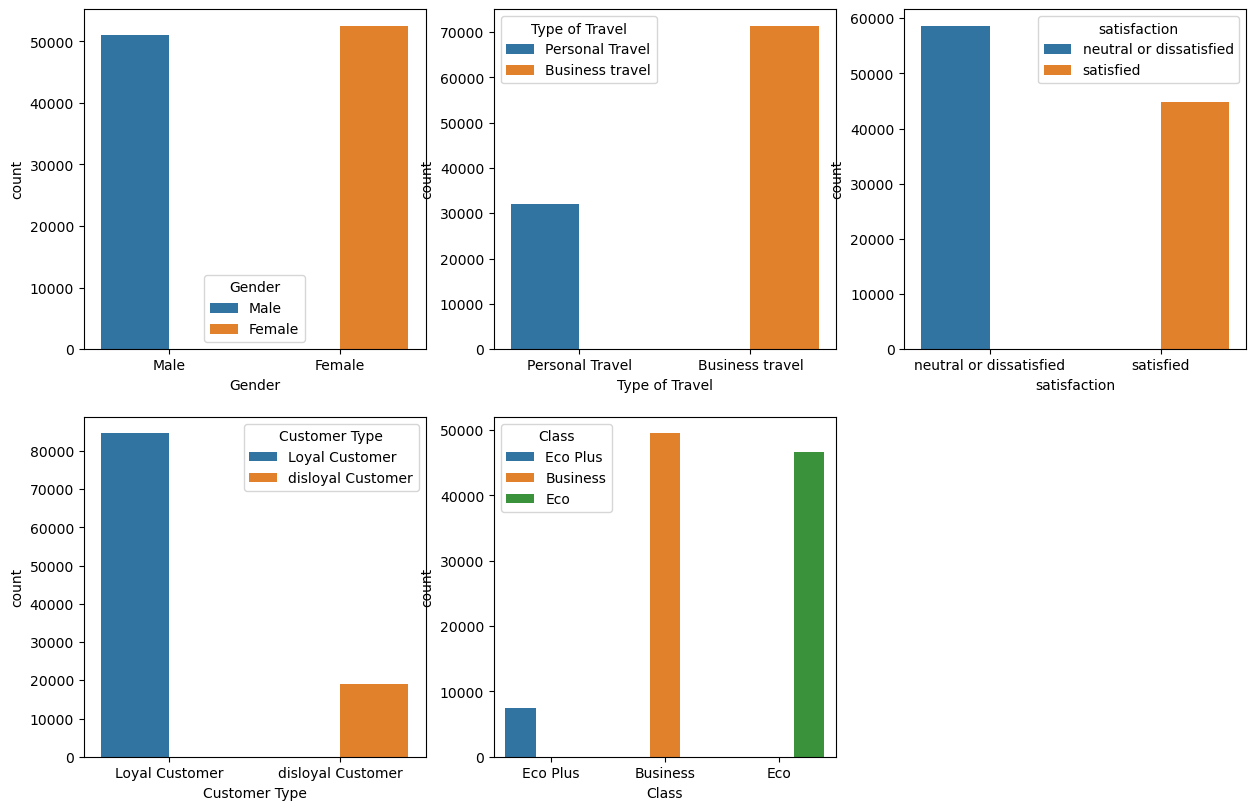

In [15]:
plt.figure(figsize=(15,15))
for n , col in enumerate(['Gender', 'Type of Travel', 'satisfaction', 'Customer Type', 'Class']):
    plt.subplot(3,3,n+1)
    sns.countplot(x=col,hue=col,data=df)
 
 #Female is more common but  count of males and females are nearly close   
 #Business travel is the most
 #neural or dissipated is the most in the satisfaction
 #loyal cusomers are the most
 #Business class is the most 

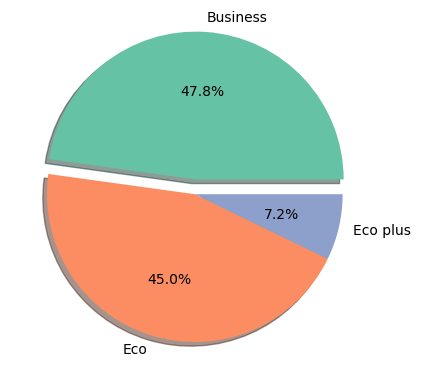

In [16]:
plt.pie(df["Class"].value_counts(),labels = ["Business","Eco","Eco plus"],shadow=True,autopct="%1.1f%%", colors=sns.color_palette('Set2'),explode=[0.1,0,0])
plt.show()
#trying the pie plot for class distribution

<Axes: xlabel='Age', ylabel='Density'>

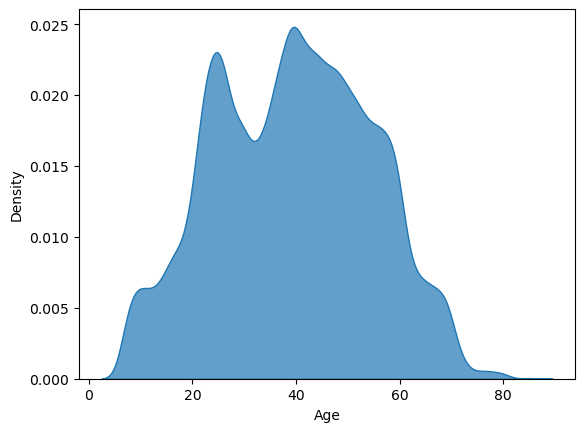

In [17]:
sns.kdeplot(x="Age",data=df,fill=True,alpha=0.7)
#most travellers between 40,60 years old

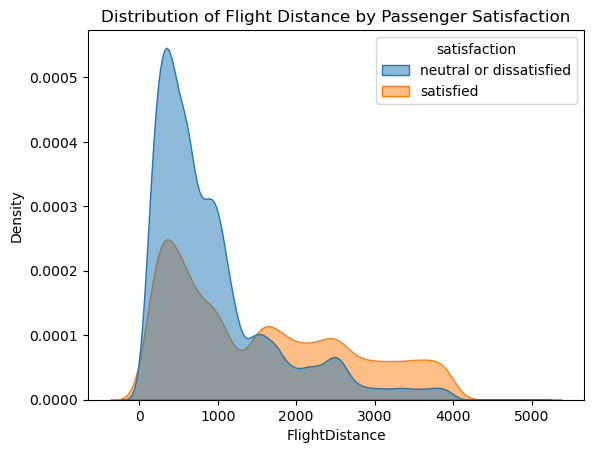

In [18]:
sns.kdeplot(x="Flight Distance",hue="satisfaction",data=df,fill=True,alpha=0.5)
plt.title("Distribution of Flight Distance by Passenger Satisfaction")
plt.xlabel("FlightDistance")
plt.ylabel("Density")
plt.show()
# The longer the distance the more the customer is satisfied

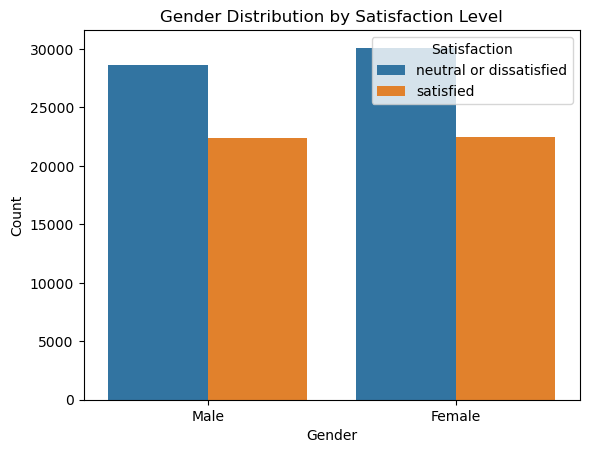

In [19]:
sns.countplot(data=df, x='Gender', hue='satisfaction')
plt.title('Gender Distribution by Satisfaction Level')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.show()
#Gender has no influence on the satisfaction of the customer

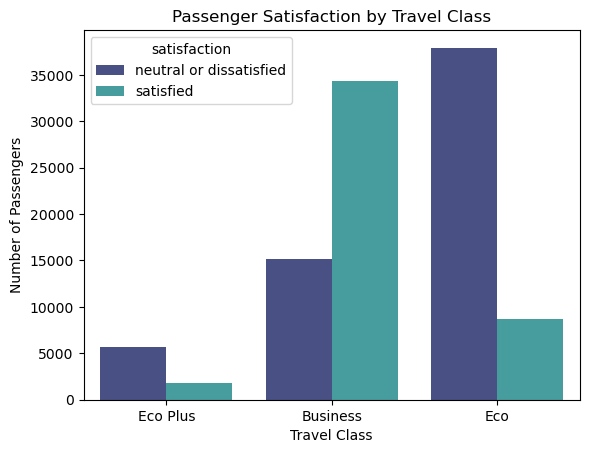

In [20]:
sns.countplot(x="Class",data=df,hue="satisfaction",palette="mako")
plt.title('Passenger Satisfaction by Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Number of Passengers')
plt.show()
#The satisfaction level varies significantly between the different classes. * The number of satisfied passengers in the business class has a higher range than from Economy and Eco-Plus classes, and this indicates that the quality of service and experience may differ based on the class of travelling

Text(0.5, 1.0, 'Customer Satisfaction by Age Group')

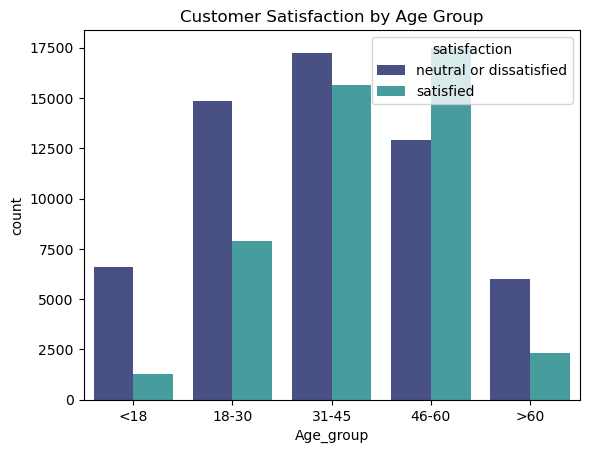

In [21]:
df["Age_group"]=pd.cut(df["Age"],bins=[0,18,30,45,60,70],labels=["<18","18-30","31-45","46-60",">60"],right=False)
#makeing the countplot
sns.countplot(x="Age_group",data=df,hue="satisfaction",palette="mako")
plt.title('Customer Satisfaction by Age Group')
#The younger passengers tend to be less satisfied compared to older ones, which can guide targeted improvements for specific age groups

Text(0.5, 1.0, 'Customer Satisfaction by Cleanliness')

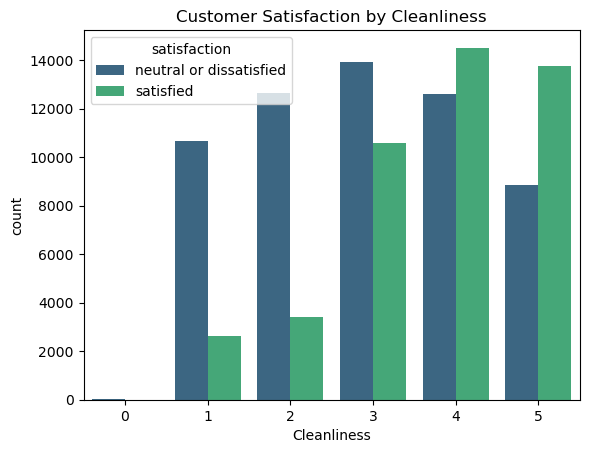

In [22]:
sns.countplot(x="Cleanliness",data=df,hue="satisfaction",palette="viridis")
plt.title('Customer Satisfaction by Cleanliness')
#when the cleanliness was 4,5 the passenger was satisfied and so on..,so cleanliness is a factor that can influence the satisfaction of the customer

Text(0.5, 1.0, 'Inflight entertainment by class')

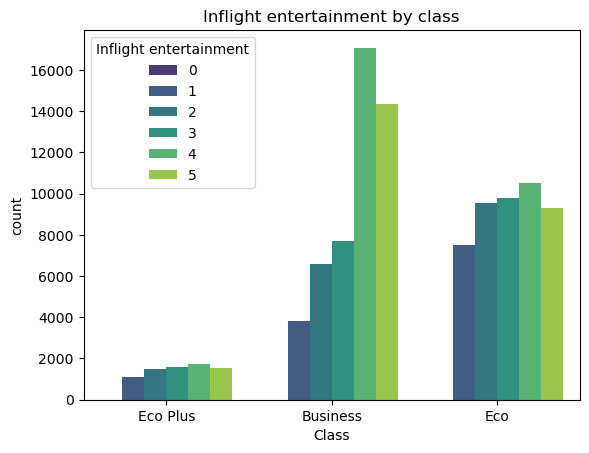

In [23]:
sns.countplot(x="Class",hue="Inflight entertainment",data=df,palette='viridis')
plt.title("Inflight entertainment by class")
# business class has the most inflight entertainment

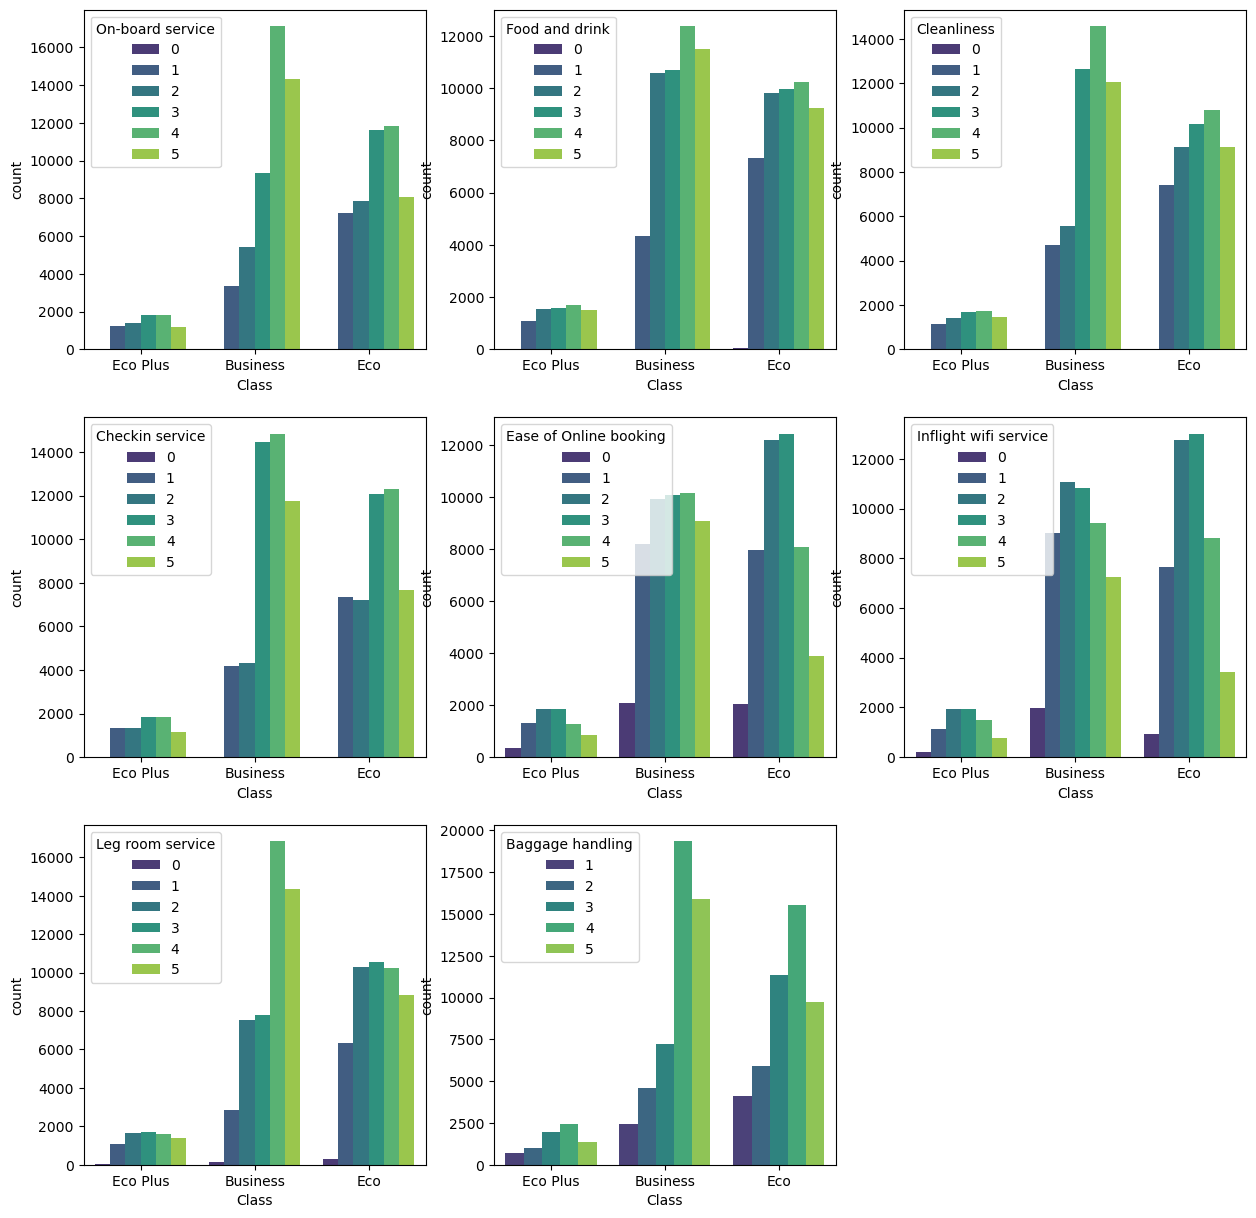

In [24]:
plt.figure(figsize=(15,15))
for n , col in enumerate(['On-board service','Food and drink','Cleanliness','Checkin service','Ease of Online booking','Inflight wifi service','Leg room service','Baggage handling']):
    plt.subplot(3,3,n+1)
    sns.countplot(x='Class',hue=col,data=df,palette='viridis')
#As we expected business class has the most facilities(rate 5) from seat comfort,wifi service,easy of online booking and so on...

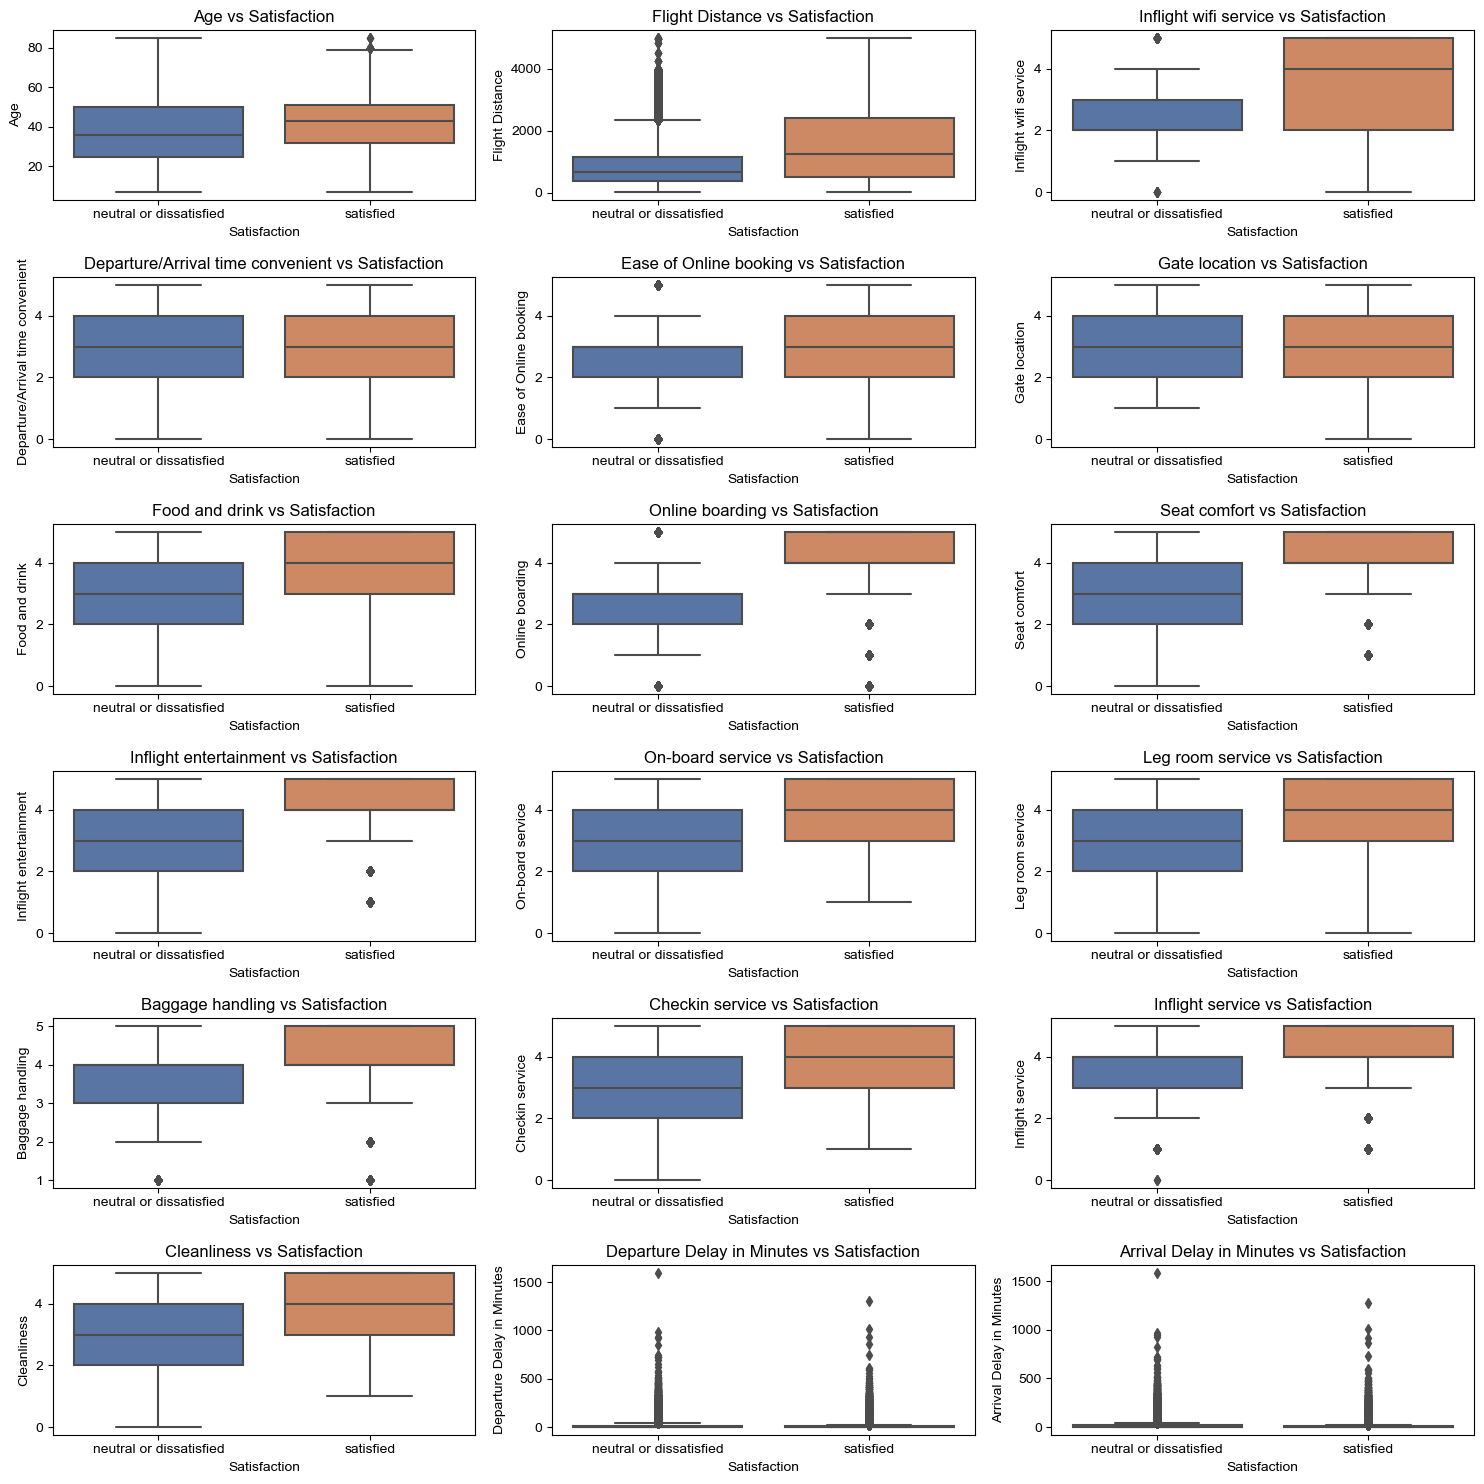

In [37]:
num_cols=df.select_dtypes(include=('int','float')).columns.to_list()
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 15))
# Flatten axes if necessary
axes = axes.flatten()
sns.set(style="whitegrid")
# Plot each rating on a subplot with smooth visuals
for i in range(len(num_cols)):
    sns.boxplot(x='satisfaction', y=num_cols[i], data=df, ax=axes[i])
    axes[i].set_title(f'{num_cols[i]} vs Satisfaction', fontsize=12)
    axes[i].set_xlabel('Satisfaction', fontsize=10)
    axes[i].set_ylabel(num_cols[i], fontsize=10)
plt.tight_layout()
plt.show()
#we notice The higher median in the "satisfied" category suggests that effective baggage handling,cleanliness,food and drink,wifi service,... plays a key role in driving customer satisfaction.but something as Departure/Arrival time convenient,gate location,.. does not affect satisfaction much

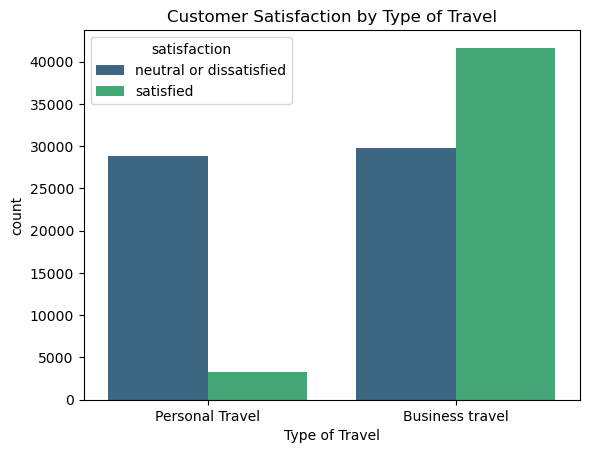

In [27]:
sns.countplot(data=df, x='Type of Travel', hue='satisfaction', palette='viridis')
plt.title('Customer Satisfaction by Type of Travel')
plt.show()
#Business travel passengers are satisfied than the personal travel

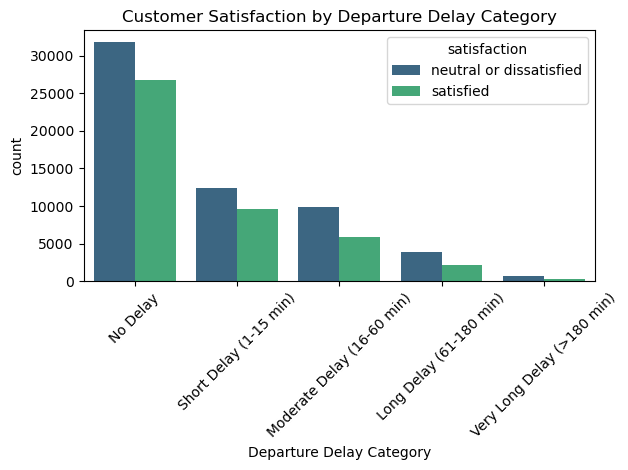

In [29]:
bins = [-1, 0, 15, 60, 180, df['Departure Delay in Minutes'].max()]
labels = ['No Delay', 'Short Delay (1-15 min)', 'Moderate Delay (16-60 min)', 'Long Delay (61-180 min)', 'Very Long Delay (>180 min)']

# Create a new column in the DataFrame with the binned data
df['Departure Delay Category'] = pd.cut(df['Departure Delay in Minutes'], bins=bins, labels=labels)

# Create a countplot 
sns.countplot(data=df, x='Departure Delay Category', hue='satisfaction', palette='viridis')

# Customize title and labels
plt.title('Customer Satisfaction by Departure Delay Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#departure delay affect the satisfaction negatively

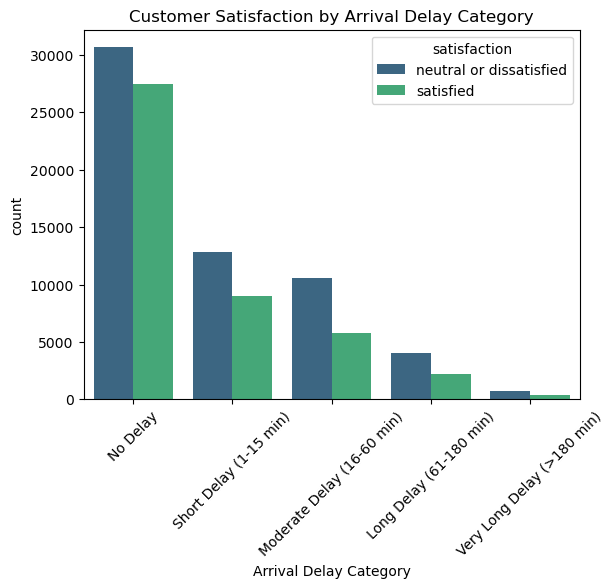

In [30]:
bins = [-1, 0, 15, 60, 180, df['Arrival Delay in Minutes'].max()]
labels = ['No Delay', 'Short Delay (1-15 min)', 'Moderate Delay (16-60 min)', 'Long Delay (61-180 min)', 'Very Long Delay (>180 min)']

# Create a new column in the DataFrame with the binned data
df['Arrival Delay Category'] = pd.cut(df['Arrival Delay in Minutes'], bins=bins, labels=labels)

# Create the count plot
sns.countplot(data=df, x='Arrival Delay Category', hue='satisfaction', palette='viridis')
plt.title('Customer Satisfaction by Arrival Delay Category')
plt.xticks(rotation=45)
plt.show()
##departure delay affect the satisfaction negatively

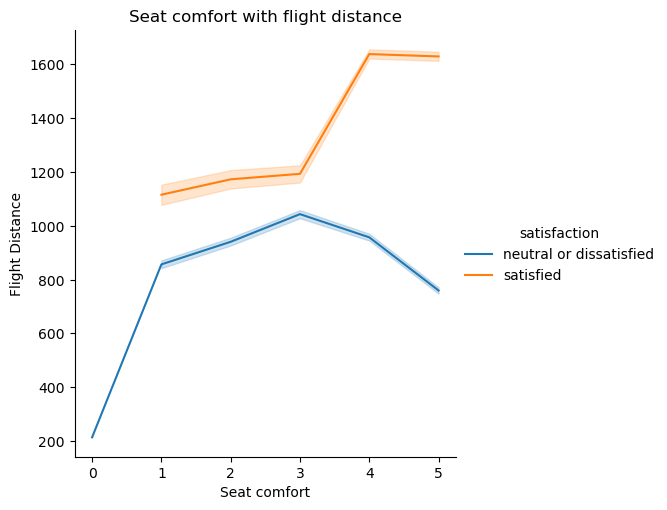

In [36]:
sns.relplot(data=df,x='Seat comfort',y='Flight Distance',hue='satisfaction',kind='line')
plt.title('Seat comfort with flight distance')
plt.show()
#seat comfort increase with flight distance and passenger is more satisfied during high rating of seat comfort with long distances travel

In [31]:
import plotly.express as px
fig= px.histogram(df,x='Seat comfort',color='Age_group',barmode='group',color_discrete_sequence=px.colors.sequential.Magenta,template='plotly_dark',title='Variation of seat comfort with each group of age')
fig.show()
#bigger age see that the seat is comfortable especially age group 46-60 and smaller people see thet that it is not comfortable(most of rate 1 from groups 18-30 )

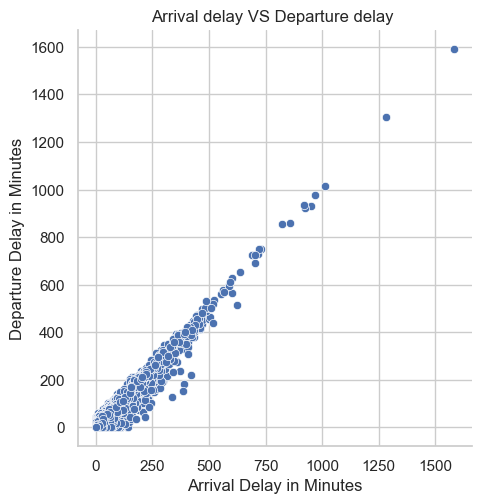

In [41]:
sns.relplot(data=df,x='Arrival Delay in Minutes',y='Departure Delay in Minutes')
plt.title('Arrival delay VS Departure delay ')
plt.show()
#It is logically true if there is departure delay there will be arrival delay the relation is linear

In [42]:
df.to_csv('AirLine_cleaned.csv')